In [1]:
import sys
from pathlib import Path

# Añade el directorio raíz del proyecto al sys.path
project_root = Path('../src').resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from genering_graphs.oit_data_grapher import *
from processing_data.oit_data_processor import *

In [3]:
# Variables que se usan para procesar los datos

columns = ['sex', 'classif1', 'classif2']
column_to_keep = ['time', 'sex', 'classif1', 'classif2', 'obs_value']


rename_map = {
                'sex.label': 'sex',
                'classif1.label': 'classif1',
                'classif2.label': 'classif2'
            }


In [4]:
filename = 'youth_working-age_population_by_sex,_age_and_education_(thousands).csv'
filepath = f'../data/raw/{filename}'


df1 = load_data(filepath, rename_map, column_to_keep)
export_dataframe(df1, filename=f'cleanned_{filename}')

In [5]:
fill_missing_values(df1, group_cols=columns)

,time,sex,classif1,classif2,obs_value
0,2017,Sex: Total,Age (Youth bands): 15-29,Education (Aggregate levels): Total,7988.515
1,2017,Sex: Total,Age (Youth bands): 15-29,Education (Aggregate levels): Less than basic,101.121
2,2017,Sex: Total,Age (Youth bands): 15-29,Education (Aggregate levels): Basic,2148.420
3,2017,Sex: Total,Age (Youth bands): 15-29,Education (Aggregate levels): Intermediate,3169.844
4,2017,Sex: Total,Age (Youth bands): 15-29,Education (Aggregate levels): Advanced,2559.120
...,...,...,...,...,...
646,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Less than basic,21.608
647,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Basic,738.294
648,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Intermediate,151.944
649,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Advanced,341.210


In [6]:
df1_clean = remove_totals(df1, columns)
df1_clean

,time,sex,classif1,classif2,obs_value
0,2017,Sex: Male,Age (Youth bands): 15-29,Education (Aggregate levels): Less than basic,64.063
1,2017,Sex: Male,Age (Youth bands): 15-29,Education (Aggregate levels): Basic,1248.967
2,2017,Sex: Male,Age (Youth bands): 15-29,Education (Aggregate levels): Intermediate,1679.162
3,2017,Sex: Male,Age (Youth bands): 15-29,Education (Aggregate levels): Advanced,1077.501
4,2017,Sex: Male,Age (Youth bands): 15-29,Education (Aggregate levels): Level not stated,6.001
...,...,...,...,...,...
349,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Less than basic,21.608
350,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Basic,738.294
351,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Intermediate,151.944
352,2005,Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Advanced,341.210


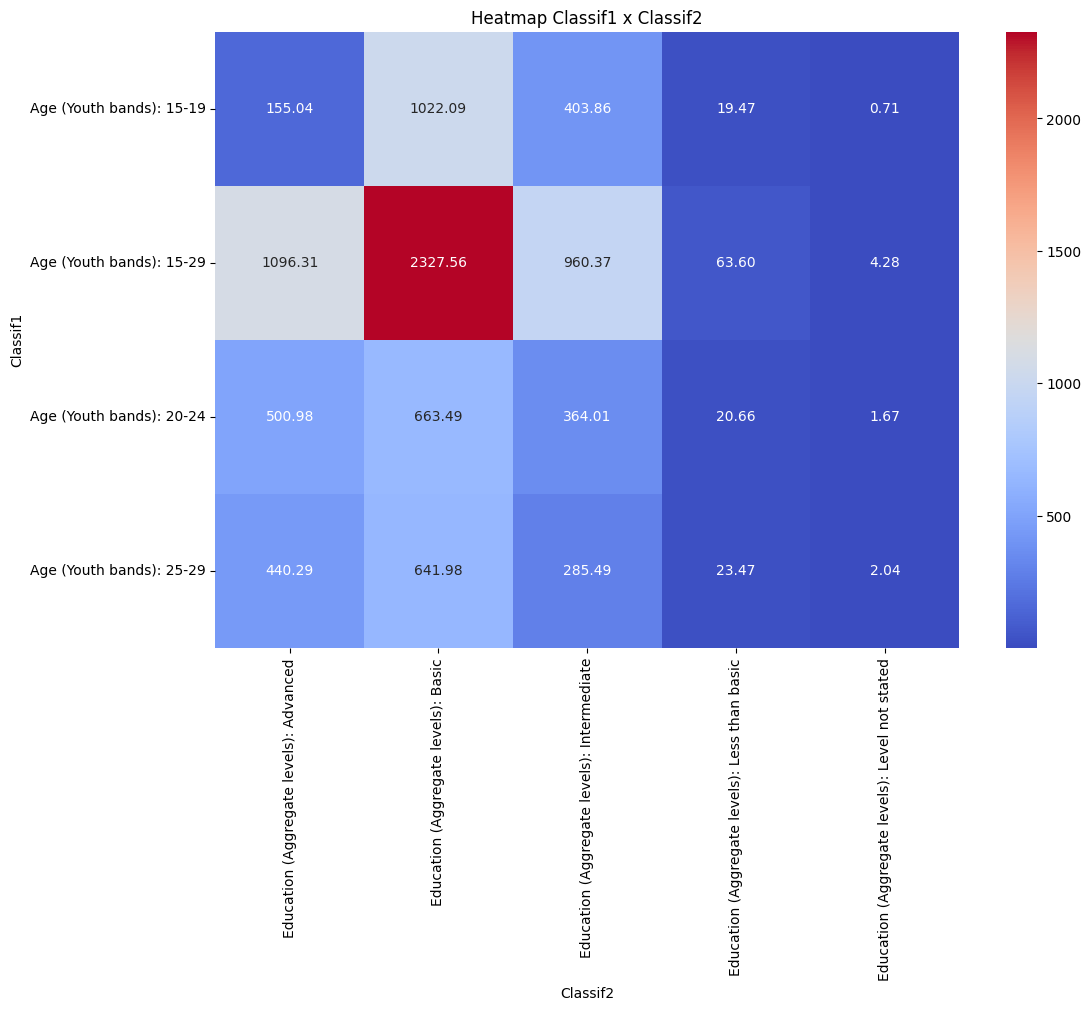

In [7]:
pivot_classif1_x_classif2 = create_pivot_table(df1_clean, 'classif1', 'classif2')
plot_heatmap(pivot_classif1_x_classif2, 'Heatmap Classif1 x Classif2')


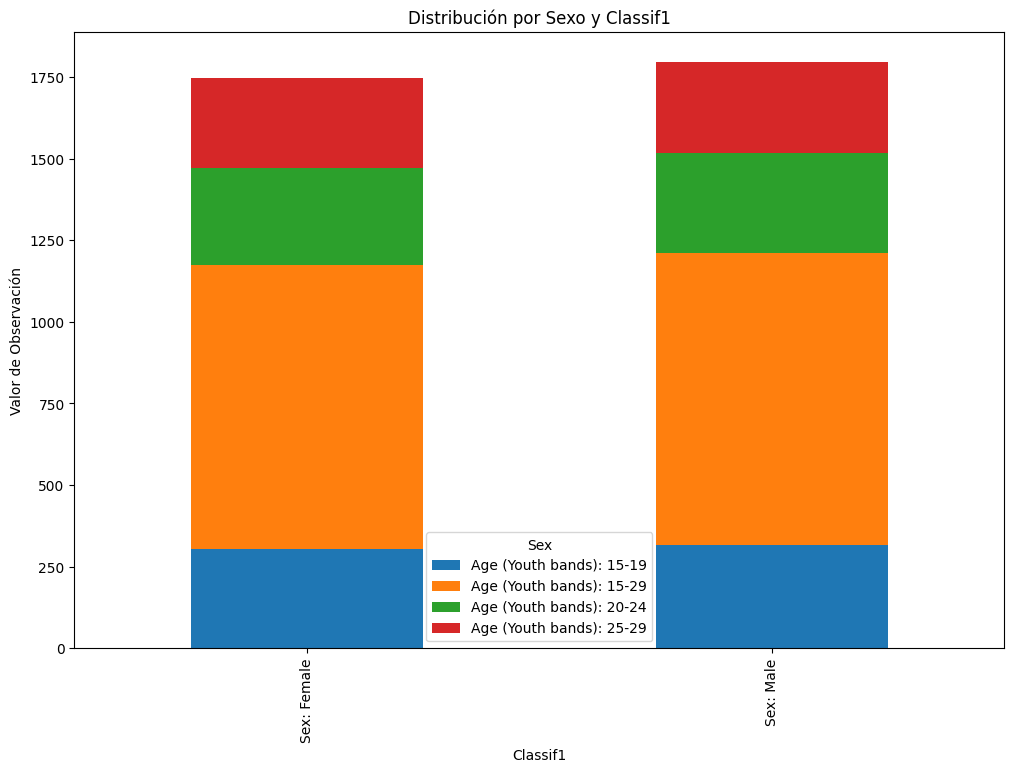

In [8]:
pivot_sex_x_classif1 = create_pivot_table(df1_clean, 'sex', 'classif1')
plot_stacked_bar(pivot_sex_x_classif1, 'Distribución por Sexo y Classif1', 'Classif1', 'Valor de Observación')


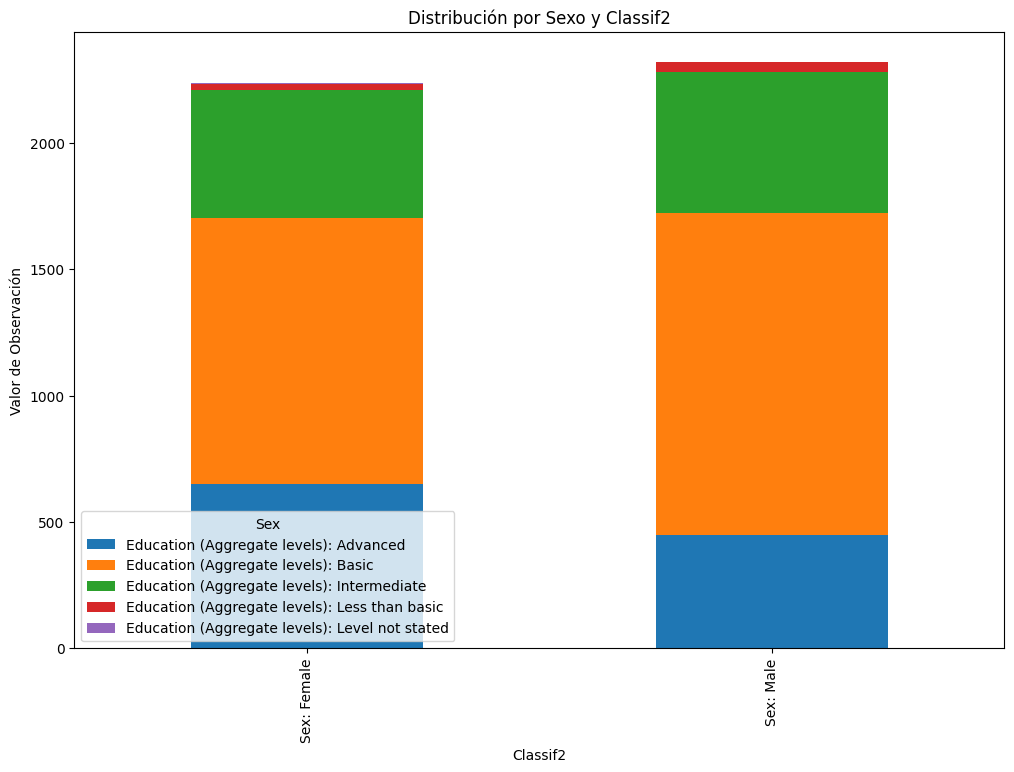

In [9]:
pivot_sex_x_classif2 = create_pivot_table(df1_clean, 'sex', 'classif2')
plot_stacked_bar(pivot_sex_x_classif2, 'Distribución por Sexo y Classif2', 'Classif2', 'Valor de Observación')


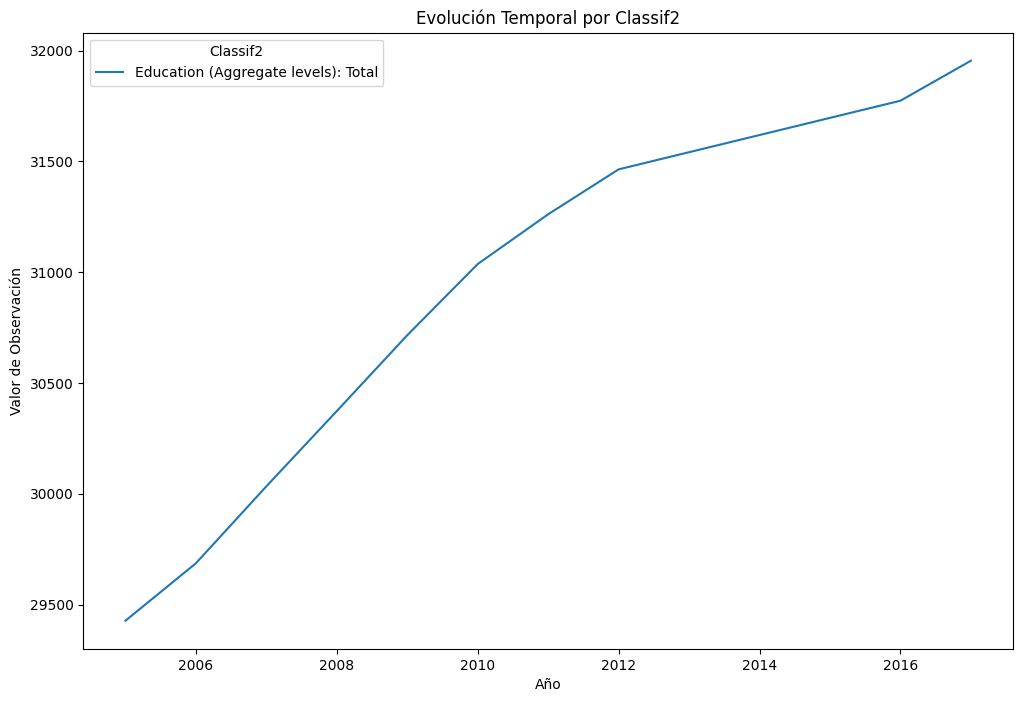

In [10]:
total_pivot = create_total_pivot_table(
    df=df1,
    index_col='time',
    value_col='obs_value',
    total_cols=['classif2']
)
plot_line_chart(total_pivot, 'Evolución Temporal por Classif2', 'Año', 'Valor de Observación')

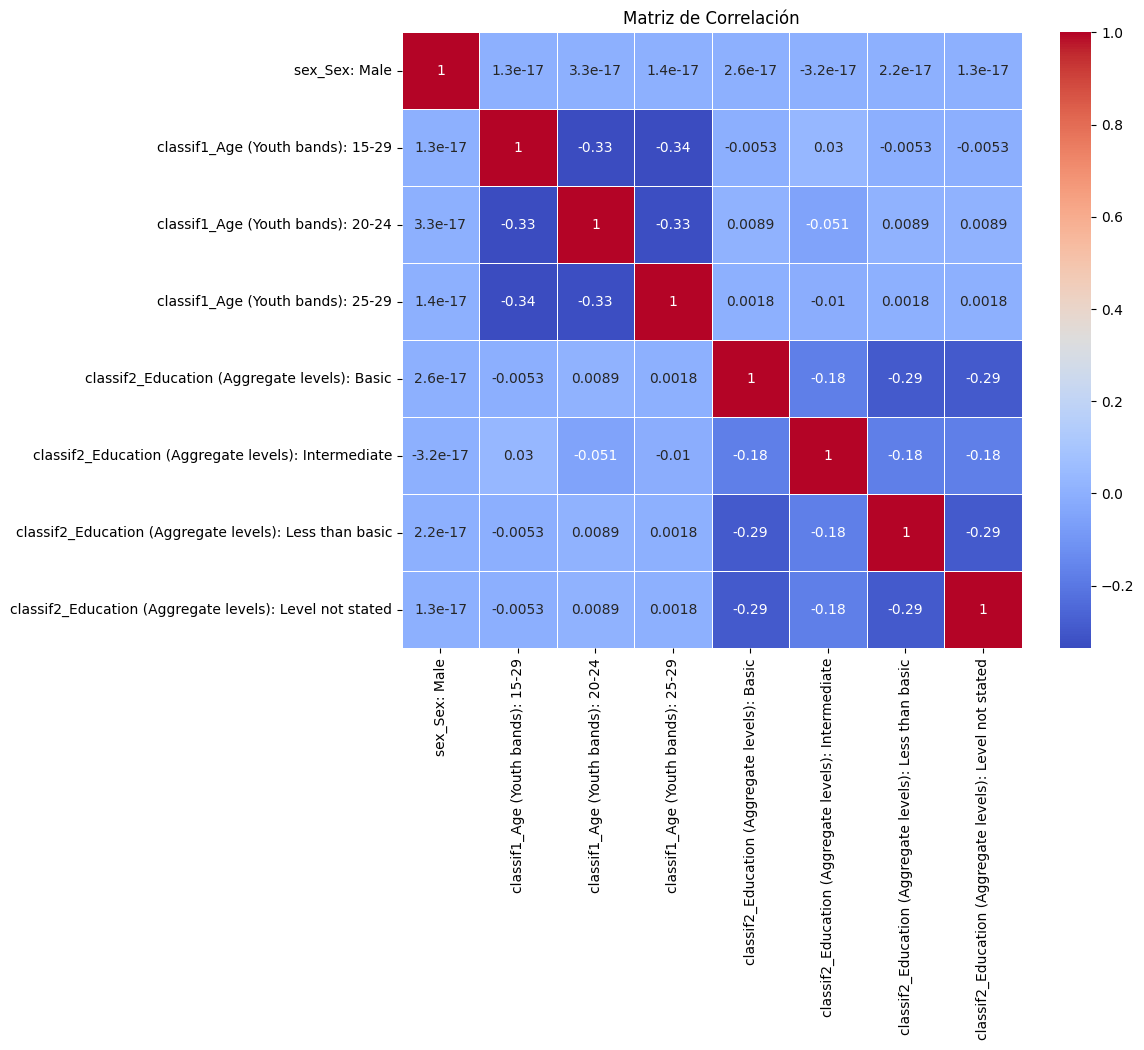

In [14]:
correlation_matrix = calculate_correlations(
    df=df1_clean,
    categorical_cols=['sex', 'classif1', 'classif2']  # Columnas categóricas
)

plot_correlation_heatmap(correlation_matrix, 'Matriz de Correlación')
